# 1. DICOM Data Exploration  
##  DTSC 691 Project Submission  
## Yurian Falls   



In [1]:
import matplotlib.pyplot as plt
from glob import glob
from PIL import Image 
import numpy as np
import tempfile
import pydicom
import shutil
import random
import PIL
import cv2
import os
#import pydicom as dicom

# a.	Accessing DICOM files

### Listing the files in the folder New_knee_dicom

In [2]:
# Listing the files and printing the first 5 filenames
data_path = 'New_knee_dicom/Acceptable'  # Change to Not_acceptable to see the other folder
g = glob(data_path + '/*.dcm')
files = glob(data_path + '/*.dcm')
print ("Total of %d DICOM images.\nFirst 5 filenames:" % len(g))
print (g[:5])

Total of 26 DICOM images.
First 5 filenames:
['New_knee_dicom/Acceptable\\IM-0002-0013.dcm', 'New_knee_dicom/Acceptable\\IM-0002-0014.dcm', 'New_knee_dicom/Acceptable\\IM-0002-0015.dcm', 'New_knee_dicom/Acceptable\\IM-0002-0016.dcm', 'New_knee_dicom/Acceptable\\IM-0002-0017.dcm']


### Adding the dcm extension

In [5]:
'''Sometimes DICOM Viewers or PACS systems do not export the images with the .dcm extension and we would need
to add it to be able to work with them here.
This is not our case, but I will leave this here in case I need it later
'''
# import os
# root = os.getcwd()
# for file in os.listdir('.'):
#    if not os.path.isfile(file):
#        continue
#    head, tail = os.path.splitext(file)
#    if not tail:
#        src = os.path.join(root, file)
#        dst = os.path.join(root, file + '.dcm')
#        if not os.path.exists(dst): # check if the file doesn't exist
#            os.rename(src, dst)

## a1. Accessing a single DICOM tags and image

Let's take a look at the DICOM Tags of one of the images     
IM-0003-0015.dcm

In [3]:
fpath = "New_knee_dicom/Acceptable/IM-0003-0015.dcm"
ds = pydicom.dcmread(fpath) # Assigning the tags read with pydicom to ds

In [4]:
ds # Printing the tags

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 190
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.392.200036.9116.4.2.9186.1636.5.10001.15
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7238010.5.0.3.5.4
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: 'GDCM'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'GDC']
(0008, 0012) Instance Creation Date              DA: '20200813'
(0008, 0013) Instance Creation Time              TM: '132115.000'
(0008, 0014) Instance Creator UID                UI: 1.2.392.200036.9116.4.2
(0008, 0016) SOP Class UID           

### We can select individual tags to see, as well as look at the image


File path........: New_knee_dicom/Acceptable/IM-0003-0015.dcm
SOP Class........: 1.2.840.10008.5.1.4.1.1.4 (MR Image Storage)

Patient's Name...: good_iq_2, 
Patient ID.......: 3EX-3GE-0932
Modality.........: MR
Study Date.......: 
Image size.......: 640 x 640
Pixel Spacing....: [0.2500, 0.2500]
Slice location...: 0.00000000


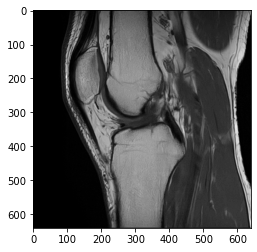

In [5]:
# From tthe PyDicom instructions. Referencced in the report

from pydicom import dcmread
from pydicom.data import get_testdata_file

#fpath = get_testdata_file("00470030.dcm")
#ds = dcmread(fpath)

# Normal mode:
print()
print(f"File path........: {fpath}")
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.show()

### Extracting individual tags

In [6]:
# Tag for sequence name
ds[0x00180024].value

'FSE2D+12'

In [14]:
# Tag for echo time
ds[0x0180081].value   # MR imaging parameter

'48.0'

### Listing the files in the folder New_knee_dicom

In [12]:
fpath_acc = "New_knee_dicom/Acceptable"
fpath_not = "New_knee_dicom/Not_Acceptable"

In [8]:
# Number of total DICOM files in a folder
from os import listdir
DCMFiles = [] 
for dirName, subdirList, fileList in os.walk(fpath_not):
    for filename in fileList:
        if ".dcm" in filename.lower():
            DCMFiles.append(os.path.join(dirName,filename))
print("Number of (.dcm) files =", len(DCMFiles))

Number of (.dcm) files = 25


In [9]:
DCMFiles

['New_knee_dicom/Not_Acceptable\\IM-0003-0001.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0002.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0003.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0004.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0005.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0006.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0007.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0008.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0009.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0010.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0011.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0012.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0013.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0014.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0015.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0016.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0017.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0018.dcm',
 'New_knee_dicom/Not_Acceptable\\IM-0003-0019.dcm',
 'New_knee_d

## b. Converting DICOM Images to JPEG Format
I will start with the Acceptable IQ Images Folder  
Then I will change the folder and repeat for the Acceptable IQ Images Folder
Make sure the receiving folders are empty before running

fpath_acc = "New_knee_dicom/Acceptable"  
fpath_not = "New_knee_dicom/Not_Acceptable"

In [13]:
# make it True if you want in PNG format
PNG = False
# Specify the .dcm folder path                                                
# folder_path = " "
jpg_fpath = "New_knee_jpeg/test/Not_acceptable/"   # Specify the output jpg or png folder path
images_path = os.listdir(fpath_not)
for n, image in enumerate(images_path):
    ds = pydicom.dcmread(os.path.join(fpath_not, image))
    pixel_array_numpy = ds.pixel_array.astype(float)
    rescaled_image = (np.maximum(pixel_array_numpy, 0)/pixel_array_numpy.max())*255  # float pixels
    final_image1 = np.uint8(rescaled_image) # integers pixels
    final_image = Image.fromarray(final_image1)
    if PNG == False:
        image = image.replace('.dcm', '.jpg')
    else:
        image = image.replace('.dcm', '.png')
    cv2.imwrite(os.path.join(jpg_fpath, image), np.uint8(final_image))
    if n % 5 == 0:
        print('{} image converted'.format(n))

0 image converted
5 image converted
10 image converted
15 image converted
20 image converted


## c. Checking JPEG image resolution

In [14]:
# printing the resolution of the images
# Makeing sure we are in the right directory
os.chdir('New_knee_jpeg/test/Acceptable')
import glob
for extension in ["jpg", 'png']:
  i = 1
  for imgfile in glob.glob("*." + extension):
    img = Image.open(imgfile)
    print (i,") ",imgfile,", resolution: ",img.size[0],"x",img.size[1])
    i += 1
  print ("\n")

1 )  IM-0002-0013.jpg , resolution:  576 x 576
2 )  IM-0002-0014.jpg , resolution:  576 x 576
3 )  IM-0002-0015.jpg , resolution:  576 x 576
4 )  IM-0002-0016.jpg , resolution:  576 x 576
5 )  IM-0002-0017.jpg , resolution:  576 x 576
6 )  IM-0002-0018.jpg , resolution:  576 x 576
7 )  IM-0002-0019.jpg , resolution:  576 x 576
8 )  IM-0002-0020.jpg , resolution:  576 x 576
9 )  IM-0002-0021.jpg , resolution:  576 x 576
10 )  IM-0002-0022.jpg , resolution:  576 x 576
11 )  IM-0002-0023.jpg , resolution:  576 x 576
12 )  IM-0002-0024.jpg , resolution:  576 x 576
13 )  IM-0002-0025.jpg , resolution:  576 x 576
14 )  IM-0003-0013.jpg , resolution:  640 x 640
15 )  IM-0003-0014.jpg , resolution:  640 x 640
16 )  IM-0003-0015.jpg , resolution:  640 x 640
17 )  IM-0003-0016.jpg , resolution:  640 x 640
18 )  IM-0003-0017.jpg , resolution:  640 x 640
19 )  IM-0003-0018.jpg , resolution:  640 x 640
20 )  IM-0003-0019.jpg , resolution:  640 x 640
21 )  IM-0003-0020.jpg , resolution:  640 x 640
2

## d. Exporting DICOM tags to a CVS file

fpath_acc = "New_knee_dicom/Acceptable"  
fpath_not = "New_knee_dicom/Not_Acceptable"

(0008, 1150) Referenced SOP Class UID            UI: MR Image Storage  
(0010, 0010) Patient's Name                      PN: 'good_iq_2'  
(0010, 0020) Patient ID                          LO: '3EX-3GE-0932'  
(0010, 0030) Patient's Birth D  

In [15]:
# Change the directory here
os.chdir('A:/OneDrive/Desktop/EU_MS/DTSC_691_Applied DS_ Project/project_jupyter/Falls_project/Tuning/New_knee_dicom/Acceptable')

In [16]:
# Assign the folder path to a DICOM image
f_path = 'A:/OneDrive/Desktop/EU_MS/DTSC_691_Applied DS_ Project/project_jupyter/Falls_project/Tuning/New_knee_dicom/Acceptable/IM-0003-0014.dcm'

In [17]:
#Save DICOM tags to csv file
import csv
from pydicom.data import get_testdata_file

ds =  pydicom.dcmread(f_path)

with open('dicom_tags.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow("Group Elem Description VR value".split())
    for elem in ds:
        writer.writerow([
            f"{elem.tag.group:04X}", f"{elem.tag.element:04X}",
            elem.description(), elem.VR, str(elem.value)])